In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_excel('Walmart.xlsx',index_col="Date",parse_dates=True)


In [3]:
dataset.head()


,Revenue
Date,
2005-01-31,79126
2005-04-30,71680
2005-07-31,76697
2005-10-31,75397
2006-01-31,88327


<AxesSubplot:xlabel='Date'>

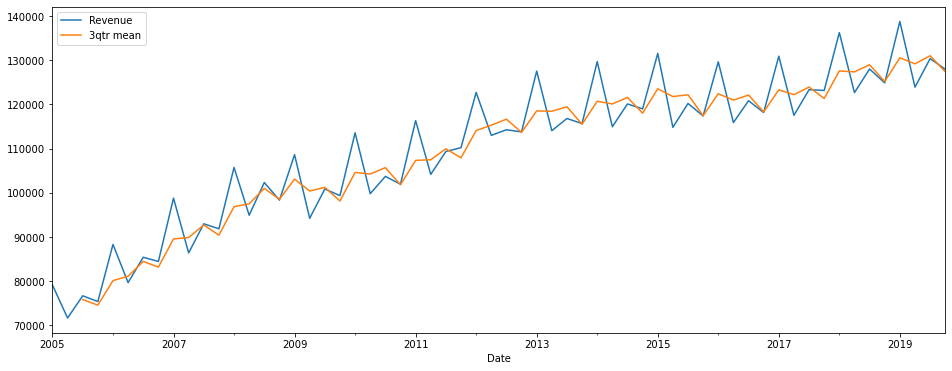

In [4]:
dataset['3qtr mean'] = dataset['Revenue'].rolling(window=3).mean()
dataset[['Revenue','3qtr mean']].plot(figsize=(16,6))

In [5]:
training_set=dataset['Revenue']
training_set=pd.DataFrame(training_set)


In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(1, 60):
    X_train.append(training_set_scaled[i-1:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [9]:
# Initialising the RNN
regressor = Sequential()



In [10]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 15, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 15, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 15, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 15))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [11]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 2)


Epoch 1/100
30/30 [==============================] - 12s 13ms/step - loss: 0.3656
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 0.3399
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 0.1718
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0641
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0619
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0486
Epoch 7/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0411
Epoch 8/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0482
Epoch 9/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0472
Epoch 10/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0440
Epoch 11/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0442
Epoch 12/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0458
Epoch 13/100
30/30 [====

In [12]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_excel('Walmart_test.xlsx',index_col="Date",parse_dates=True)



In [13]:
real_revenue = dataset_test.iloc[:, 0].values

In [14]:
dataset_test.head()

,Revenue
Date,
2020-01-31,141671
2020-04-30,134622
2020-07-31,137742
2020-10-31,134708
2021-01-31,152079


In [15]:
test_set=dataset_test['Revenue']
test_set=pd.DataFrame(test_set)

In [16]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Revenue'], dataset_test['Revenue']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 2:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(1, 6):
    X_test.append(inputs[i-1:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_revenue = regressor.predict(X_test)
predicted_revenue = sc.inverse_transform(predicted_revenue)

In [17]:
predicted_revenue=pd.DataFrame(predicted_revenue)

In [18]:
predicted=[]
for i in predicted_revenue[0]:
    predicted.append(i)

dataset_test["Prediction"]=predicted
dataset_test["Accuracy"]=dataset_test.Prediction/dataset_test.Revenue
dataset_test

,Revenue,Prediction,Accuracy
Date,,,
2020-01-31,141671,126151.828125,0.890456
2020-04-30,134622,124889.101562,0.927702
2020-07-31,137742,131023.921875,0.951227
2020-10-31,134708,128189.812500,0.951612
2021-01-31,152079,129524.976562,0.851695


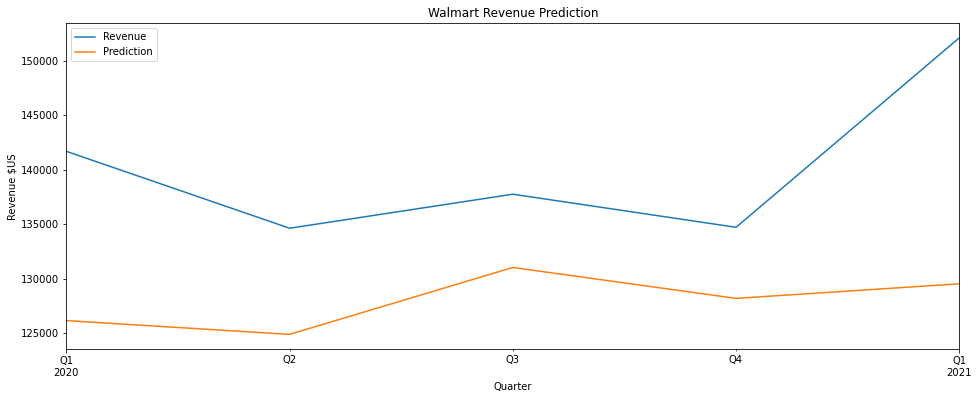

In [19]:
dataset_test[['Revenue','Prediction']].plot(figsize=(16,6))
plt.title('Walmart Revenue Prediction')
plt.xlabel('Quarter')
plt.ylabel('Revenue $US')
plt.show()